In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import math


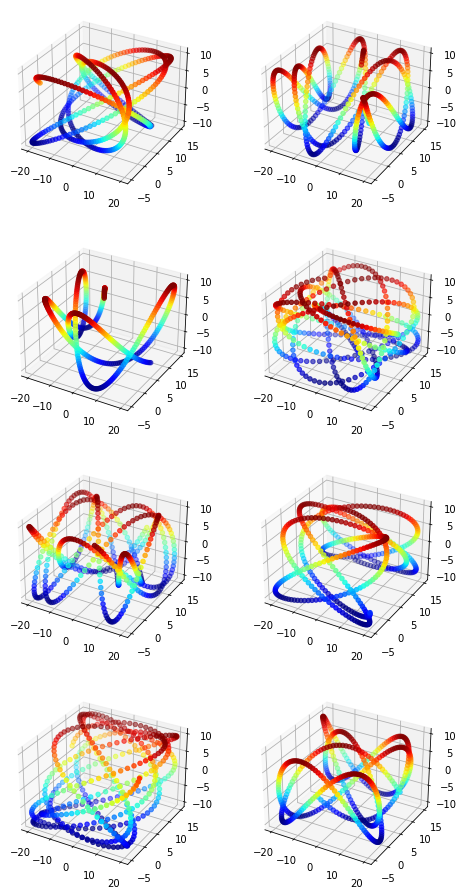

In [61]:
# Number of trajectories:
N = 8

# Number of points per trajectory:
M = 500

min_roll = -20
max_roll = 20
min_pitch = -5
max_pitch = 15
min_yaw = -10
max_yaw = 10

np.random.seed(429471)

def standardize_to_vals(x, min_val=-20, max_val = 20):
    x -= x.min()
    x /= x.max()
    x *= max_val-min_val
    x += min_val
    return x

def LHS_sampling(N, dims=5, max_val=N):
    a = np.linspace(1,max_val,N*dims)
    np.random.shuffle(a)
    
    list_of_arrays = np.split(a,dims)
    return list_of_arrays



list_of_arrays = LHS_sampling(N,max_val=int(M/50))

a = list_of_arrays[0]
b = list_of_arrays[1]
c = list_of_arrays[2]

delta = np.pi/list_of_arrays[3]
phi = np.pi/list_of_arrays[4]

max_val = 20

t = np.linspace(-np.pi,np.pi,M)



fig = plt.figure(figsize=(8,N*2))
for i in range(0,N):
 roll = standardize_to_vals(np.sin(a[i] * t + delta[i]), min_roll, max_roll)
 pitch = standardize_to_vals(np.sin(b[i] * t), min_pitch, max_pitch)
 yaw = standardize_to_vals(np.sin(c[i] * t + phi[i]), min_yaw, max_yaw)

 ax = plt.subplot(int(N/2),2,i+1, projection='3d')
 xyz_as_table = np.concatenate((np.expand_dims(x,1),np.expand_dims(y,1),np.expand_dims(z,1)),axis=1)
 np.savetxt(str(i)+'_lissajous_roll_pitch_yaw+-'+str(max_val)+'.csv',xyz_as_table,delimiter=',')
 
 
 cmjet = plt.get_cmap("jet")
 ax.scatter(roll,pitch,yaw,c=yaw,cmap=cmjet)


plt.savefig('lissajous.png', transparent=False, dpi=300)
plt.show()



